In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

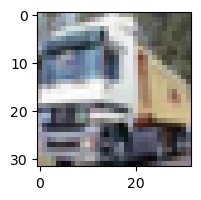

In [6]:
plt.figure(figsize = (2,2),dpi = 100)
plt.imshow(X_train[1])

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plot_figure(X,y,index):
    plt.figure(figsize = (2,2),dpi = 100)
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])
    

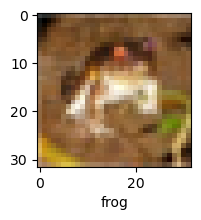

In [11]:
plot_figure(X_train,y_train,0)

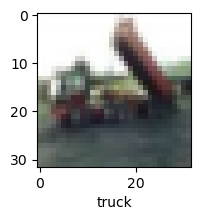

In [12]:
plot_figure(X_train,y_train,2)

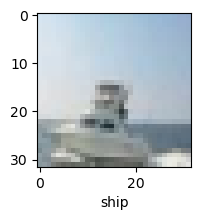

In [13]:
plot_figure(X_train,y_train,100)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000,activation = "relu"),
    layers.Dense(1000,activation = "relu"),
    layers.Dense(10,activation = "sigmoid")
])

ann.compile(optimizer = "SGD",
           loss = "sparse_categorical_crossentropy",
           metrics = ["accuracy"])
ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 207s 130ms/step - loss: 1.8168 - accuracy: 0.3502
Epoch 2/5
1563/1563 [==============================] - 215s 138ms/step - loss: 1.6244 - accuracy: 0.4247
Epoch 3/5
1563/1563 [==============================] - 211s 135ms/step - loss: 1.5399 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 216s 138ms/step - loss: 1.4813 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 228s 146ms/step - loss: 1.4315 - accuracy: 0.4962


In [16]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 18s 55ms/step - loss: 1.5168 - accuracy: 0.4548


[1.516785979270935, 0.454800009727478]

In [17]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 14s 44ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.35      0.46      1000
           1       0.43      0.81      0.56      1000
           2       0.47      0.16      0.24      1000
           3       0.31      0.35      0.33      1000
           4       0.54      0.23      0.33      1000
           5       0.39      0.39      0.39      1000
           6       0.40      0.70      0.51      1000
           7       0.68      0.41      0.51      1000
           8       0.47      0.75      0.58      1000
           9       0.52      0.40      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



### Here we can see the accuracy is very low so we can use CNN

In [18]:
cnn = models.Sequential([
    
    #CNN
    layers.Conv2D(filters=32,kernel_size = (3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation = "relu"),
    layers.MaxPool2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation = "relu"),
    layers.Dense(10,activation = "softmax"),
    
    
])
    
    

In [19]:
cnn.compile(  optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [20]:
cnn.fit(X_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 98s 60ms/step - loss: 1.4655 - accuracy: 0.4751
Epoch 2/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.1314 - accuracy: 0.6028
Epoch 3/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.9997 - accuracy: 0.6517
Epoch 4/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.9147 - accuracy: 0.6818
Epoch 5/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.8439 - accuracy: 0.7074
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7881 - accuracy: 0.7264
Epoch 7/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.7413 - accuracy: 0.7417
Epoch 8/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.6996 - accuracy: 0.7569
Epoch 9/10
1563/1563 [==============================] - 94s 60ms/step - loss: 0.6631 - accuracy: 0.7666
Epoch 10/10
1563/1563 [==============================] - 97s 6

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.9486 - accuracy: 0.6893


[0.9485663175582886, 0.689300000667572]

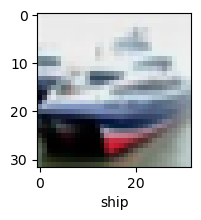

In [22]:
plot_figure(X_test,y_test, 1)

In [23]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[2.26866559e-05, 2.28039407e-05, 1.11944850e-04, 9.77365613e-01,
        7.61863659e-04, 1.53089287e-02, 1.31311058e-03, 1.84909477e-05,
        5.06334938e-03, 1.11985373e-05],
       [6.31670374e-03, 3.04440744e-02, 5.88917658e-07, 3.94754625e-06,
        1.65661220e-06, 9.50298045e-08, 3.14706796e-07, 4.70887684e-08,
        9.62949574e-01, 2.83063011e-04],
       [3.76801230e-02, 6.38827085e-01, 4.38393932e-03, 3.44577469e-02,
        2.44642738e-02, 5.00843301e-03, 1.81016629e-03, 1.33009301e-02,
        1.52635530e-01, 8.74317512e-02],
       [5.53247392e-01, 2.15591788e-01, 3.24001983e-02, 4.11247127e-02,
        1.48564000e-02, 2.70476710e-04, 3.46217118e-03, 1.09207416e-04,
        1.36179343e-01, 2.75829318e-03],
       [2.08758138e-06, 1.37331090e-05, 1.32911131e-02, 3.66153531e-02,
        6.02516115e-01, 2.30827206e-03, 3.45154792e-01, 6.46864692e-07,
        9.75814110e-05, 3.12701331e-07]], dtype=float32)

In [24]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[3, 8, 1, 0, 4]

In [25]:
y_test[:5].reshape(-1,)

array([3, 8, 8, 0, 6], dtype=uint8)

In [26]:
print("Classification Report: \n", classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.70      0.73      1000
           1       0.76      0.83      0.79      1000
           2       0.64      0.56      0.60      1000
           3       0.46      0.56      0.50      1000
           4       0.72      0.55      0.62      1000
           5       0.55      0.68      0.61      1000
           6       0.75      0.78      0.76      1000
           7       0.80      0.69      0.74      1000
           8       0.80      0.78      0.79      1000
           9       0.75      0.77      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

